In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [6]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [8]:
pd.get_dummies(df.occupation).add_prefix('occupation_')

,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df = pd.concat([df.drop('occupation',axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass',axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education',axis=1)
df = pd.concat([df.drop('marital-status',axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('race',axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country',axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)
df = pd.concat([df.drop('relationship',axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)

In [10]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,True,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,True,False,False,True,False,False,False,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,True,False,False,True,False,False,False,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,True,False,False,True,False,False,False,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,True,False,False,False,False,False,False,False,True
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,True,False,False,True,False,False,False,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,True,False,False,False,False,False,False,True,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,True,False,False,False,False,False,True,False,False


In [11]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [12]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,226802,7,1,0,0,40,0,False,False,...,False,True,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,True,False,False,True,False,False,False,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,True,False,False,True,False,False,False,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,True,False,False,True,False,False,False,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,True,False,False,False,False,False,False,False,True
48838,40,154374,9,1,0,0,40,1,False,False,...,False,True,False,False,True,False,False,False,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,True,False,False,False,False,False,False,True,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,True,False,False,False,False,False,True,False,False


In [13]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'mari

<Axes: >

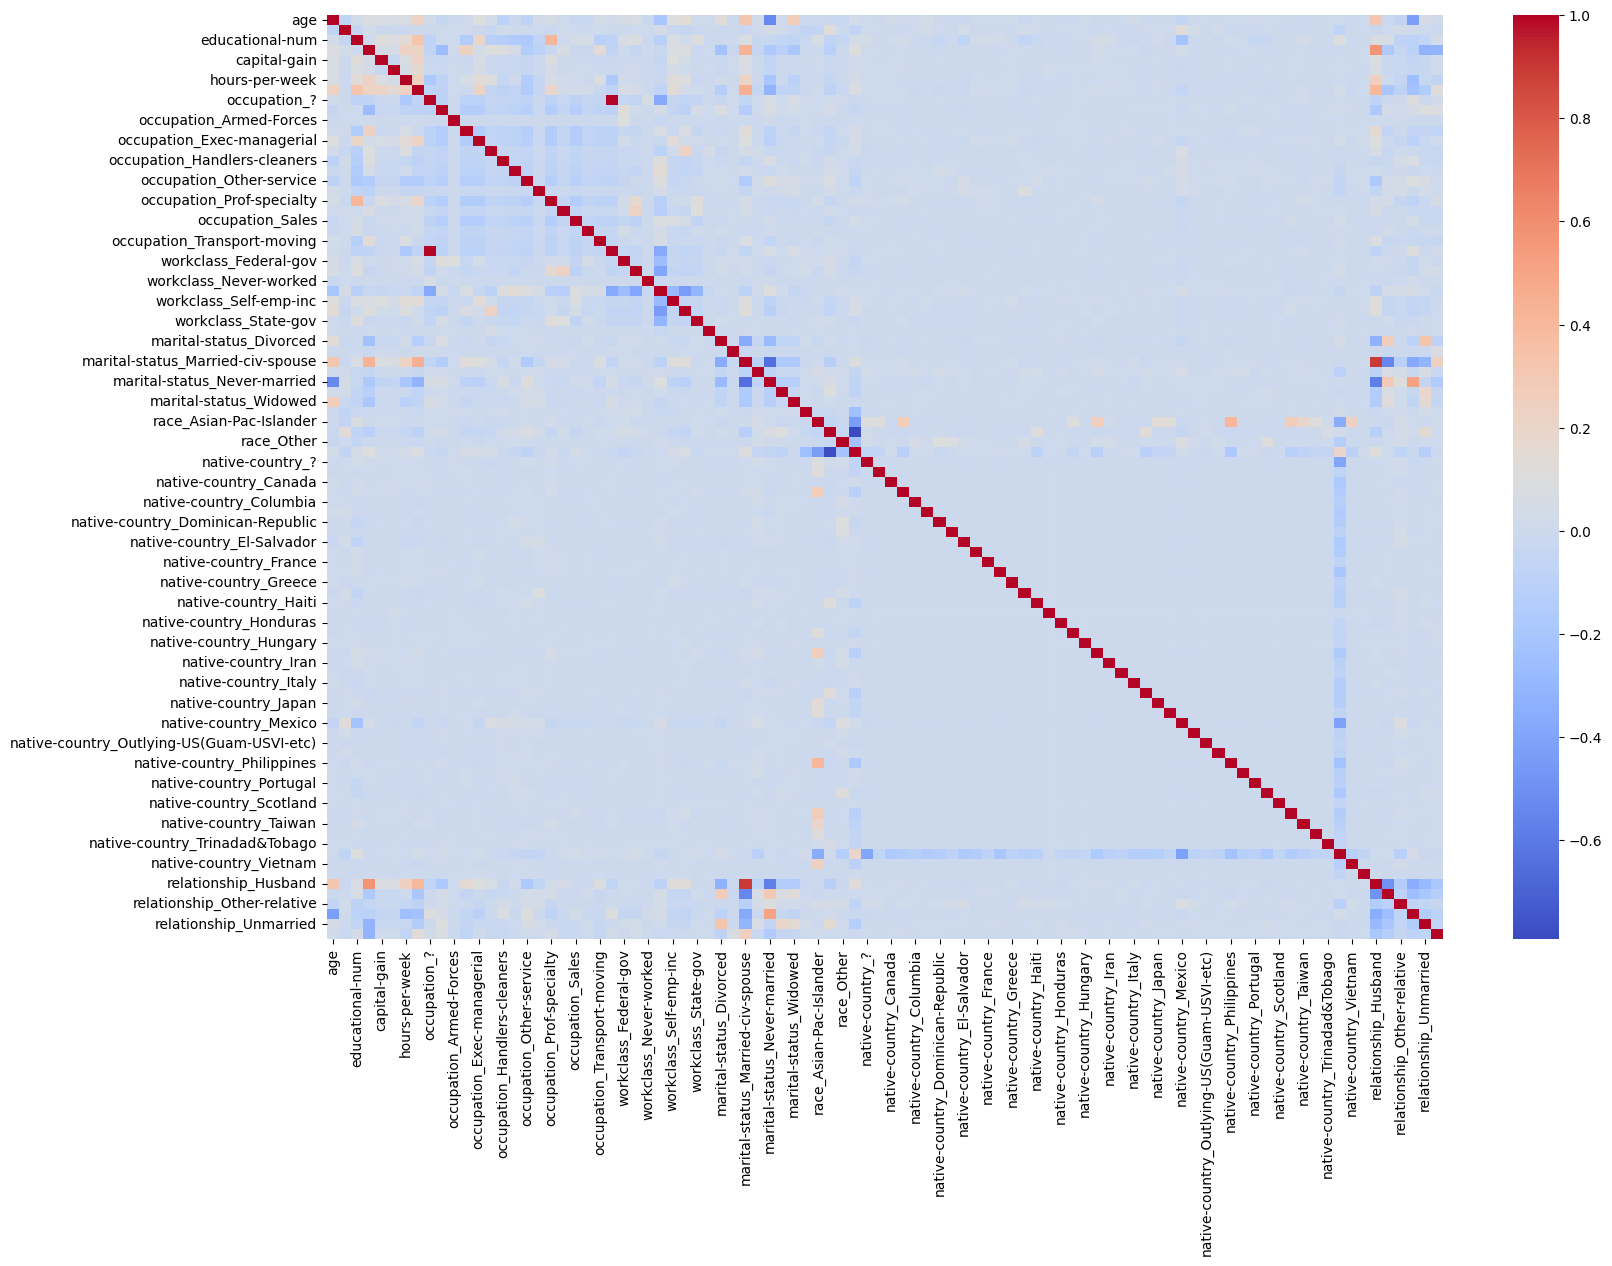

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [15]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.001056,0.011888,-0.012337,0.002905,0.315799,-0.009538,-0.067945,-0.432990,0.041670,0.023430
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,0.004153,-0.070645,-0.007479,0.004699,-0.019250,0.003839,0.023411,0.016716,0.005532,-0.018900
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.010201,0.104210,-0.007544,-0.005798,0.072659,0.057004,-0.085253,-0.097316,-0.059461,0.035749
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,-0.009342,-0.011167,-0.001545,0.005262,0.579310,-0.168916,-0.047735,-0.103624,-0.316325,-0.317284
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.003039,0.004191,-0.002673,-0.000474,0.076781,-0.023329,-0.020204,-0.052038,-0.028864,0.017416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relationship_Not-in-family,-0.009538,0.003839,0.057004,-0.168916,-0.023329,-0.015585,0.005109,-0.190372,-0.011396,0.041763,...,-0.001904,0.019089,-0.007991,-0.004155,-0.484678,1.000000,-0.105075,-0.252509,-0.201700,-0.131880
relationship_Other-relative,-0.067945,0.023411,-0.085253,-0.047735,-0.020204,-0.016633,-0.047419,-0.085601,0.009862,0.014110,...,0.005883,-0.106383,0.026409,-0.003872,-0.146753,-0.105075,1.000000,-0.076456,-0.061071,-0.039931
relationship_Own-child,-0.432990,0.016716,-0.097316,-0.103624,-0.052038,-0.049167,-0.251827,-0.225691,0.106614,0.048423,...,-0.007675,0.042606,-0.000470,-0.001485,-0.352665,-0.252509,-0.076456,1.000000,-0.146763,-0.095959
relationship_Unmarried,0.041670,0.005532,-0.059461,-0.316325,-0.028864,-0.034718,-0.034536,-0.143642,-0.010545,0.101243,...,0.003317,-0.015920,0.006336,-0.004352,-0.281703,-0.201700,-0.061071,-0.146763,1.000000,-0.076651


In [17]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_of_cols_to_drop = int(0.8 * len(df.columns))
cols_to_dorp = sorted_correlations.iloc[:num_of_cols_to_drop].index
df_dropped = df.drop(cols_to_dorp, axis=1)

In [18]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

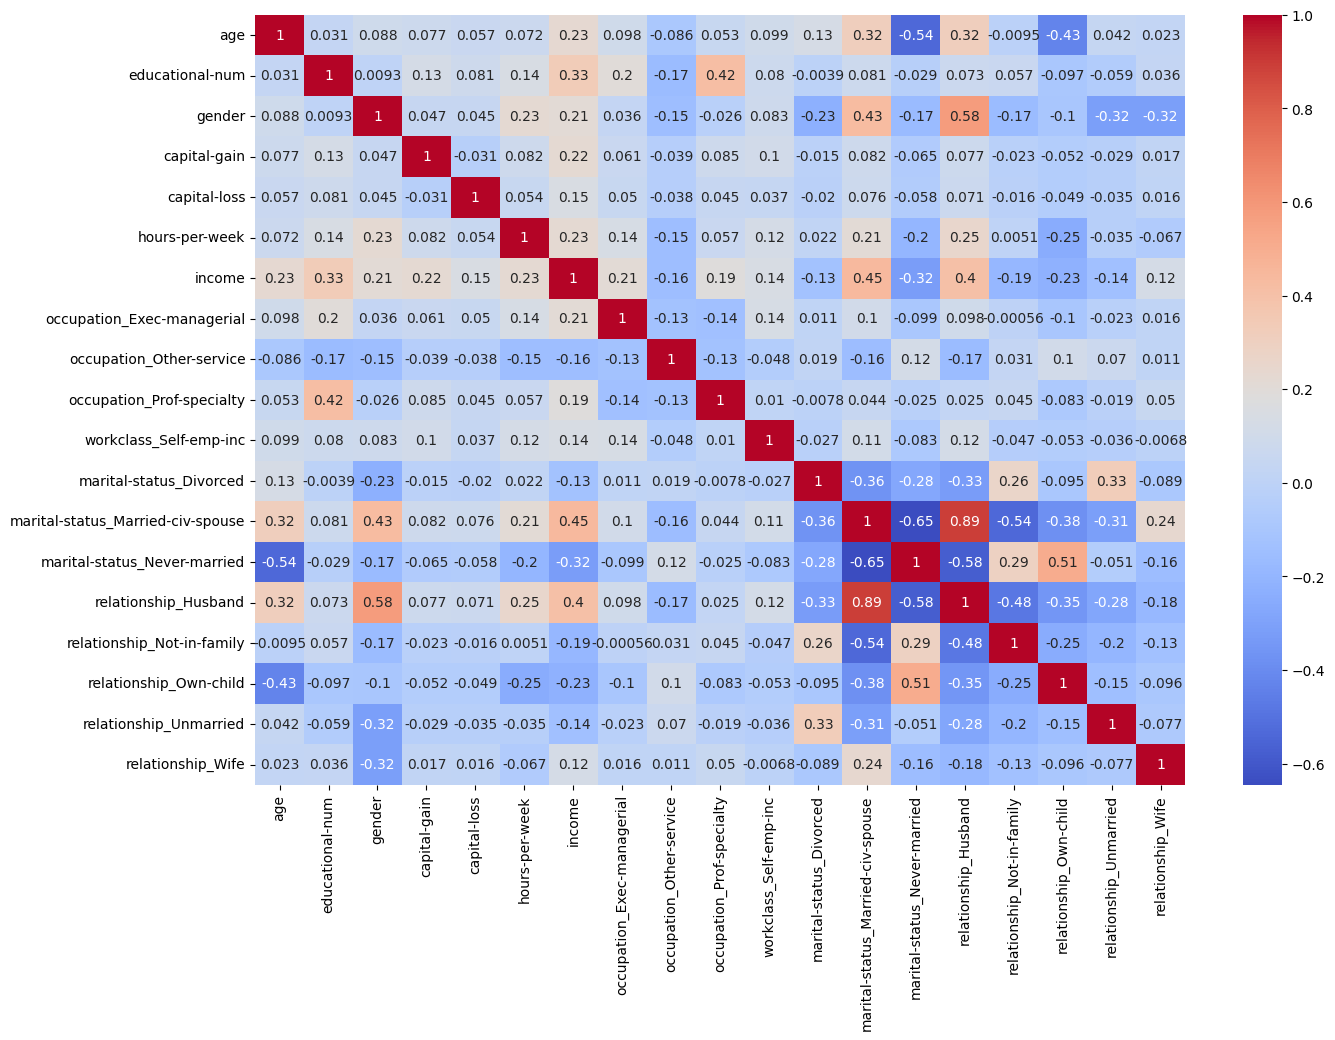

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [35]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
37640,29,13,1,0,0,50,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
39348,34,9,1,0,2001,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
34680,39,13,1,0,0,40,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
21055,30,12,0,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
31738,22,9,0,0,0,35,0,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,53,13,1,14344,0,55,1,False,False,False,...,False,True,False,False,False,True,False,False,False,False
44909,36,16,1,0,0,45,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
19395,20,10,1,0,0,30,0,False,False,False,...,False,True,False,False,False,False,False,True,False,False
20154,34,9,0,0,0,35,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [36]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
15889,35,9,1,0,0,55,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1962,42,9,1,0,0,60,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
38646,20,5,1,0,0,50,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
32318,22,9,1,0,0,40,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False
22440,41,9,0,0,0,40,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11210,38,12,1,0,0,35,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
27716,56,9,1,0,0,40,1,False,True,False,...,False,True,False,False,True,False,False,False,False,False
45683,69,11,0,0,0,25,0,False,False,False,...,False,True,False,False,False,True,False,False,False,False
35095,43,15,1,0,0,60,1,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [37]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [38]:
forest = RandomForestClassifier()

forest.fit(train_X,train_y)

RandomForestClassifier()

In [39]:
forest.score(test_X,test_y)

0.852492578564848

In [40]:
forest.feature_importances_

array([2.31052129e-01, 1.27894705e-01, 1.50983737e-02, 1.09305102e-01,
       3.70139522e-02, 1.14488159e-01, 1.92733601e-03, 5.05562437e-03,
       1.02164863e-04, 5.84581911e-03, 2.19742994e-02, 4.54862668e-03,
       3.70703387e-03, 4.04390906e-03, 8.64224068e-03, 2.14955651e-04,
       1.68097564e-02, 2.82813041e-03, 6.24127888e-03, 4.10044187e-03,
       4.15222628e-03, 2.01404046e-03, 5.06367183e-03, 5.45239350e-03,
       2.69344490e-06, 9.05645917e-03, 6.10353120e-03, 8.12748118e-03,
       4.13950750e-03, 1.27039087e-04, 6.91156632e-03, 3.82420424e-04,
       7.21673455e-02, 1.09535384e-03, 2.85548734e-02, 2.17463052e-03,
       1.88261502e-03, 1.47929606e-03, 2.99723224e-03, 4.69567458e-03,
       9.91118374e-04, 6.14393465e-03, 2.73164087e-03, 3.29783987e-04,
       1.20068678e-03, 5.44595775e-04, 2.72327458e-04, 8.19522189e-04,
       2.25957828e-04, 1.64321028e-04, 2.64686376e-04, 9.14676904e-04,
       4.27658127e-04, 1.26945107e-03, 5.10969151e-04, 1.25155749e-04,
      

In [41]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [42]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [43]:
importances

{'age': 0.23105212948738285,
 'educational-num': 0.1278947052183966,
 'hours-per-week': 0.11448815869426818,
 'capital-gain': 0.10930510172550831,
 'marital-status_Married-civ-spouse': 0.07216734548197397,
 'relationship_Husband': 0.04408319489987113,
 'capital-loss': 0.03701395224874468,
 'marital-status_Never-married': 0.0285548734255001,
 'occupation_Exec-managerial': 0.02197429936575569,
 'occupation_Prof-specialty': 0.01680975638801314,
 'gender': 0.01509837365718666,
 'relationship_Not-in-family': 0.010376192289322867,
 'relationship_Wife': 0.010132891741016163,
 'workclass_Private': 0.009056459171369814,
 'occupation_Other-service': 0.008642240678108423,
 'workclass_Self-emp-not-inc': 0.008127481182973016,
 'marital-status_Divorced': 0.006911566322391923,
 'native-country_United-States': 0.0062618884594100475,
 'occupation_Sales': 0.006241278878802143,
 'race_White': 0.006143934652225703,
 'workclass_Self-emp-inc': 0.006103531204616299,
 'occupation_Craft-repair': 0.005845819105

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100,250],
    'max_depth' : [5,10,30,None],
    'min_samples_split' : [2,4],
    'max_features' : ['sqrt','log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,verbose=10)

In [45]:
grid_search.fit(train_X,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [46]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [47]:
forest = grid_search.best_estimator_

In [48]:
forest.score(test_X,test_y)

0.86764254273723

In [49]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k,v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [50]:
importances

{'age': 0.15119926588340735,
 'capital-gain': 0.13472194944096222,
 'educational-num': 0.13357530794562603,
 'marital-status_Married-civ-spouse': 0.09423945590646006,
 'hours-per-week': 0.09365734323994648,
 'relationship_Husband': 0.05350076549348517,
 'capital-loss': 0.04206453059581056,
 'marital-status_Never-married': 0.03631088604321755,
 'occupation_Exec-managerial': 0.024303176254825896,
 'occupation_Prof-specialty': 0.023246140843080097,
 'gender': 0.01483246319675775,
 'relationship_Not-in-family': 0.01256218218405223,
 'relationship_Wife': 0.01202890563056095,
 'relationship_Own-child': 0.011103696549172813,
 'occupation_Other-service': 0.008798193288445496,
 'marital-status_Divorced': 0.008709303707250576,
 'workclass_Self-emp-not-inc': 0.008597717214726457,
 'workclass_Private': 0.00853698979600166,
 'relationship_Unmarried': 0.007925766989700765,
 'workclass_Self-emp-inc': 0.006653687546647046,
 'native-country_United-States': 0.006175060811093779,
 'occupation_Sales': 0.0